In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('dataset/all_bikez_curated.csv')
df.head()

C:\Users\samam\AppData\Local\Temp\ipykernel_5360\4099011539.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/all_bikez_curated.csv')


,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm)
0,acabion,da vinci 650-vi,2011,Prototype / concept model,NaN,804.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,Chain,420.0,NaN,NaN
1,acabion,gtbo 55,2007,Sport,1300.0,541.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,360.0,NaN,NaN
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,536.0,Electric,Electric,NaN,NaN,NaN,NaN,Liquid,NaN,420.0,NaN,NaN
4,acabion,gtbo 70,2007,Prototype / concept model,1300.0,689.0,In-line four,four-stroke,6-speed,NaN,Turbo. KKK Acabion Extended,NaN,Liquid,NaN,300.0,NaN,NaN


In [3]:
df.shape

(38543, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38543 entries, 0 to 38542
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38543 non-null  object 
 1   Model                38515 non-null  object 
 2   Year                 38543 non-null  object 
 3   Category             38543 non-null  object 
 4   Displacement (ccm)   37514 non-null  float64
 5   Power (hp)           26162 non-null  float64
 6   Engine cylinder      38527 non-null  object 
 7   Engine stroke        38532 non-null  object 
 8   Gearbox              32733 non-null  object 
 9   Fuel capacity (lts)  31747 non-null  float64
 10  Fuel system          27893 non-null  object 
 11  Fuel control         22032 non-null  object 
 12  Cooling system       34322 non-null  object 
 13  Transmission type    32912 non-null  object 
 14  Dry weight (kg)      22534 non-null  float64
 15  Wheelbase (mm)       25530 non-null 

In [5]:
df.isnull().sum()

Brand                      0
Model                     28
Year                       0
Category                   0
Displacement (ccm)      1029
Power (hp)             12381
Engine cylinder           16
Engine stroke             11
Gearbox                 5810
Fuel capacity (lts)     6796
Fuel system            10650
Fuel control           16511
Cooling system          4221
Transmission type       5631
Dry weight (kg)        16009
Wheelbase (mm)         13013
Seat height (mm)       14318
dtype: int64

In [6]:
for col in df.columns:
    print(f" {df[col].value_counts(dropna=False)} {df[col].dtype} \n ")

 Brand
yamaha             3417
honda              3322
suzuki             2440
kawasaki           2325
harley-davidson    1636
                   ... 
lea francis           1
lito                  1
livewire              1
suzuko                1
better                1
Name: count, Length: 576, dtype: int64 object 
 
 Model
servi-car ge          38
chief                 32
NaN                   28
speed twin            28
rt 2                  27
                      ..
scrambler 1100 pro     1
fun 125 plus           1
fun 125 pluss          1
lord martin            1
da vinci 650-vi        1
Name: count, Length: 17730, dtype: int64 object 
 
 Year
2010    1708
2016    1546
2011    1504
2008    1473
2009    1431
        ... 
3019       1
2077       1
2040       1
1921       1
1929       1
Name: count, Length: 237, dtype: int64 object 
 
 Category
Scooter                      6704
Sport                        5557
Enduro / offroad             4273
Custom / cruiser             4161
Nak

Brand Column :

In [7]:
# Lowercasing
df["Brand"] = df["Brand"].apply(lambda x: "".join(x.lower()))

Model Column :

In [8]:
# dropping missing values cause they are a few
df["Model"] = df["Model"].dropna()

In [9]:
list(df["Model"].unique())

['da vinci 650-vi',
 'gtbo 55',
 'gtbo 600 daytona-vi',
 'gtbo 70',
 '37 offroad e-scooter',
 'ams 3.20 supercross',
 'ams 4.30 supermoto efi',
 'ams 4.38 sm gear shift',
 'ams 4.38 sx gear shift',
 'ams 6.46 basic',
 'ams 6.46 lux',
 'ams 6.46 lux long',
 'ams 8.57 lux lv',
 'amx 8.57 efi',
 'minisport 110',
 'shade 200',
 'shade 420',
 'shade sport 650',
 'shade sport 650 eps',
 'shade sport 850',
 'shade sport 850 lv',
 'shade sport 850 touring',
 'shade xtreme 650',
 'shade xtreme 650 ng',
 'shade xtreme 850',
 'shade xtreme 850 dlx eps',
 'xtreme enduro 300',
 'xtreme s 480',
 'xtreme supermoto 300',
 'exp-4',
 'standard',
 'standard model',
 'ad 125',
 'ad 125le',
 'ad 200',
 'ad 250',
 'ad tre',
 'ad tre 55',
 'ad125',
 'ad250',
 'ad3 300',
 'ad3 300lt',
 'ad3 400',
 'ar 125',
 'ar 200',
 'ar3 200',
 'birdie',
 'cargo 3',
 'cargo2',
 'e-moving',
 'n125',
 'r125',
 'vx-1',
 'isdt',
 'junior 100 luxus',
 'm 100',
 'm 200',
 'm 250',
 'm 250 s',
 'mb 250 rs',
 'mbs 250 favorit',
 '

In [10]:
# mapping unique values 
models = [
 'da vinci 650-vi', 'gtbo 55', 'gtbo 600 daytona-vi', 'gtbo 70', 
 '37 offroad e-scooter', 'ams 3.20 supercross', 'ams 4.30 supermoto efi', 
 'ams 4.38 sm gear shift', 'ams 4.38 sx gear shift', 'ams 6.46 basic', 
 'ams 6.46 lux', 'ams 6.46 lux long', 'ams 8.57 lux lv', 'amx 8.57 efi', 
 'minisport 110', 'shade 200', 'shade 420', 'shade sport 650', 
 'shade sport 650 eps', 'shade sport 850', 'shade sport 850 lv', 
 'shade sport 850 touring', 'shade xtreme 650', 'shade xtreme 650 ng', 
 'shade xtreme 850', 'shade xtreme 850 dlx eps', 'xtreme enduro 300', 
 'xtreme s 480', 'xtreme supermoto 300', 'exp-4', 'standard', 'ad 125', 
 'ad 125le', 'ad 200', 'ad 250', 'ad tre', 'ad tre 55', 'ad3 300', 
 'ad3 300lt', 'ad3 400', 'ar 125', 'ar 200', 'ar3 200', 'birdie', 
 'cargo 3', 'cargo2', 'e-moving', 'n125', 'r125', 'vx-1', 'isdt', 
 'junior 100 luxus', 'm 100', 'm 200', 'm 250', 'm 250 s', 'mb 250 rs', 
 'mbs 250 favorit', 'bullet 125', 'bullet 125 supermotard', 'cat 100', 
 'cat 125 b', 'cat 125 d', 'cat 125 s', 'cat 50', 'e-bike 2nd generation', 
 'e-bike fun cruiser', 'fc-25 e-bike fun cruiser', 'fc-25 ii 2nd gen e-bike', 
 'fox 50 (2t)', 'fox 50 (4t)', 'fun cruiser (i)', 'fun cruiser (ii)', 
 'gta-125', 'gta-150', 'gta-50', 'gtc bullseye', 'jet 100', 'jet 50', 
 'mm-50', 'noble 100', 'noble 125', 'noble 50', 'panther 100', 
 'panther 50', 'road tracer 50', 'road tracer 90', 'rt 50 roadtracer', 
 'rt-100 road tracer', 'rt-50 road tracer', 'rt-90 road tracer', 
 'sf-100 silver fox', 'sf-50 silver fox', 'silver fox 100', 'silver fox 50', 
 'super sonic 100', 'super sonic 125', 'super sonic 50', 'thunder 125', 
 'thunder 50', 'thunder bike 100', 'thunder bike 125', 'thunder bike 150', 
 'thunder bike 50', '3d-350', '3d-350 r', 'ae-11 pulsar 100', 
 'ae-12 pulsar 150', 'ae-6 echo', 'ae-9 pulsar 125', 'am-1 aero 50', 
 'am-2 aero 100', 'ax-50', 'ax-50 mini-bike', 'co-in 125i', 'cobra  rs 180', 
 'cobra 100', 'cobra 220', 'cobra 320', 'cobra 400', 'cobra 400 efi', 
 'cobra 400 supermoto', 'cobra 50', 'cobra supermoto', 'crossland 300', 
 'crossland 600 efi', 'crossland rx 400', 'crossland x4 400', 
 'elite 125', 'elite 200i', 'elite 250i', 'elite 350i', 'elite 400i', 
 'elite 400i abs', 'es 150', 'minikolt 50', 'my 125i', 'my 150', 
 'overland 180', 'overland 200 t3', 'overland 600', 'ozs 150', 
 'ozs 150 dual discs', 'quadro 350d', 'revo 100', 'revo 50', 
 'urban 125', 'urban 350i', 'xboy 10', 'xboy 12', '250 ala verde serie 1', 
 '250 ala verde serie 2', '350 tv', 'ala bianca 175', 'ala d oro', 
 'ala verde sport', 'chimera 175', 'chimera 250', 'h-d 250 ala azzurra', 
 'h-d wisconsin', 'hd 125 zeffiro', 'hd 150 zeffiro', 'ss 350', 
 'z-90', 'capri', 'capri 50', 'capri 50 s', 'capri 70', 'capri monaco', 
 'capri super brianza', 'capri super brianza 150', 'galp 50 enduro', 
 'galp 50 r', 'galp 50 supermotard', 'pr3 125 enduro', 'pr3 125 enduro pro', 
 'pr3 125 supermoto', 'pr3 240 enduro', 'pr3 240 enduro pro', 
 'pr3 240 mx pro', 'pr3 240 supermoto', 'pr4 125 enduro', 
 'pr4 125 enduro pro', 'pr4 125 sm', 'pr4 125 supermotard', 'pr4 125 supermoto', 
 'pr4 125 trial', 'pr4 200 enduro', 'pr4 200 sm', 'pr4 240 enduro', 
 'pr4 240 enduro pro', 'pr4 240 extreme', 'pr4 240 supermoto', 
 'pr5 250 enduro', 'pr5 250 extrem', 'pr5 250 supermoto', 'pr7', 
 'pr7 adventure 650', 'spr 250', 'spr 310r', 'spr 510r', '125 eco commuter', 
 'a9 flight 125', 'bobber 125', 'cadwell 125', 'cadwell clubman 125', 
 'cr3-125', 'crazy naked 50', 'csr nkt1 125', 'daytona 125', 
 'dd 125e mk3', 'dd 125e-8', 'dd50e-2', 'digita 50', 'eco-125', 
 'eco-2 125', 'eco-3', 'eos 125', 'eos 125 mk2', 'eos 350', 'exactly 125', 
 'exactly 50', 'firefox 50', 'g6 bigport', 'highway star 125', 
 'insetto 125', 'isaba 125', 'jsm 50', 'jsm 50 motard', 'jsm motard 125', 
 'jsm trail 125', 'model 14 250', 'model 16 350 spectre', 
 'model 16 350ms', 'model 18 500 statesman', 'model 20 500', 'model 30 600', 
 'model 31 650 swift', 'model 8 350', 'modena 125', 'modena 50', 
 'nac12 125', 'nac12 125 mk2', 'r7', 'sorvio 125', 'spt 350', 'stellar 350', 
 'stormer y4 250 mk 2', 'tempest roadster 125', 'tempest scrambler 125', 
 'tn 12', 'tn25 250', 'yx-r-125', 'vr 2000 enduro', 'vr 2000 supermotard', 
 'vr 250', 'a-6', 'sr 250', 'alpha 250 naked', 'alpha 250 v-twin classic', 
 'alpha 250 v-twin sport cruiser', 'redshift ex', 'redshift mx', 
 'redshift mxr', 'redshift sm', '1600', 'falcon ms cruiser', 'raptor', 
 'raven', 'street fighter', 'bandera', 'classic chop', 'judge', 'legend', 
 'lsc', 'outlaw', 'slammer', 'tejas', 'texas chopper'
]

def extract_text(input, correct_list):
    for word in correct_list:
        if re.search(r'\b'+re.escape(word)+r'\b',input, re.IGNORECASE):
            return word
    return "unknown"

df["Model"] = df["Model"].apply(lambda x : extract_text(str(x),models))

year column :

In [11]:
df["Year"] =  df["Year"].apply(lambda x: int(re.findall(r'\d+',str(x))[0]))
pd.to_numeric(df["Year"])

0        2011
1        2007
2        2011
3        2021
4        2007
         ... 
38538    2009
38539    2010
38540    2009
38541    2010
38542    2009
Name: Year, Length: 38543, dtype: int64

In [12]:
df = df[df["Year"] <= 2024]  

Category column :

In [13]:
df["Category"].unique()

array(['Prototype / concept model', 'Sport', 'Scooter', 'ATV', 'Allround',
       'Naked bike', 'Custom / cruiser', 'Cross / motocross',
       'Super motard', 'Minibike, sport', 'Minibike, cross', 'Classic',
       'Touring', 'Enduro / offroad', 'Trial', 'Unspecified category',
       'Sport touring', 'Speedway'], dtype=object)

In [14]:
df.loc[:, "Category"] = df["Category"].str.strip().str.lower()

category_map = {
    "minibike, sport" : "minibike",
    "minibike, cross" : "minibike",
    "super motard" : "supermotard",
    "cross / motocross" : "motocross",
    "enduro / offroad" : "enduro",
    "custom / cruiser" : "cruiser",
    "prototype / concept model" : "concept",
    "naked bike" : "naked",
    "sport touring" : "sport",
    "supermotard" : "motocross"
}

df.loc[:, "Category"] = df["Category"].replace(category_map)


In [15]:
df.loc[:, "Category"] = df["Category"].astype("category")

In [16]:
list(df["Category"].unique())

['concept',
 'sport',
 'scooter',
 'atv',
 'allround',
 'naked',
 'cruiser',
 'motocross',
 'supermotard',
 'minibike',
 'classic',
 'touring',
 'enduro',
 'trial',
 'unspecified category',
 'speedway']

Displacement (ccm) column :

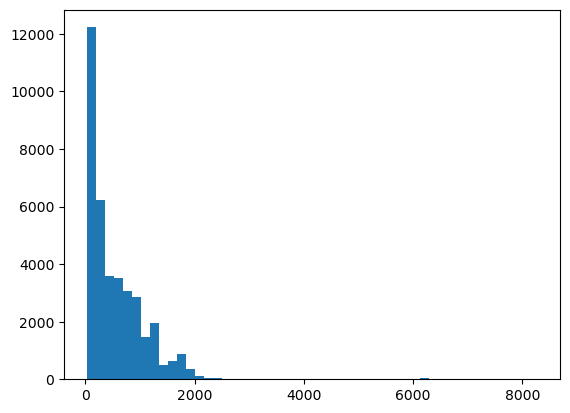

In [17]:
plt.hist(df["Displacement (ccm)"], bins=50)
plt.show()

In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df.loc[: ,"Displacement (ccm)"] = imputer.fit_transform(df[["Displacement (ccm)"]])

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["Displacement (ccm)"] = scaler.fit_transform(df[["Displacement (ccm)"]])

Power column :

In [20]:
df["Power (hp)"].value_counts()

Power (hp)
27.0     844
50.0     586
17.0     512
100.0    474
15.0     369
        ... 
94.5       1
50.3       1
78.2       1
248.0      1
52.4       1
Name: count, Length: 716, dtype: int64

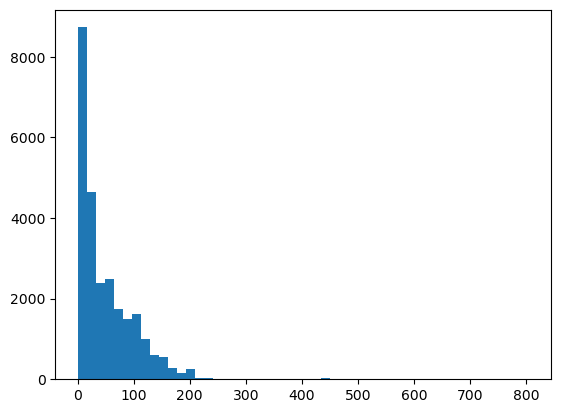

In [21]:
plt.hist(df["Power (hp)"], bins=50)
plt.show()

In [22]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["Power (hp)"] = imputer.fit_transform(df[["Power (hp)"]])
scaler = StandardScaler()
df["Power (hp)"] = scaler.fit_transform(df[["Power (hp)"]])

In [23]:
scaler = MinMaxScaler()
df["Power (hp)"] = scaler.fit_transform(df[["Power (hp)"]])

Engine cylinder column :

In [24]:
df["Engine cylinder"].value_counts()

Engine cylinder
Single cylinder         20714
V2                       7456
Twin                     3392
In-line four             3169
Electric                  997
Two cylinder boxer        936
In-line three             852
V4                        459
Six cylinder boxer        137
In-line six               114
V8                         79
Four cylinder boxer        53
V6                         42
Diesel                     37
Square four cylinder       33
Gas turbine                19
Dual disk Wankel           13
Radial                     10
Single disk Wankel          8
V3                          3
V10                         1
Name: count, dtype: int64

In [25]:
df = df.dropna(subset=["Engine cylinder", "Engine stroke"])

In [26]:
# Mapping engine descriptions to standardized names
engine_mapping = {
    r"single\s*cylinder": "Single Cylinder",
    r"v2|twin|two\s*cylinder\s*boxer": "Two Cylinder",
    r"in-?line\s*three|v3": "Three Cylinder",
    r"in-?line\s*four|four\s*cylinder\s*boxer|square\s*four\s*cylinder": "Four Cylinder",
    r"in-?line\s*six|six\s*cylinder\s*boxer|v6": "Six Cylinder",
    r"v8": "Eight Cylinder",
    r"v10": "Ten Cylinder",
    r"electric": "Electric",
    r"diesel": "Diesel",
    r"gas\s*turbine": "Gas Turbine",
    r"single\s*disk\s*wankel": "Wankel Single Disk",
    r"dual\s*disk\s*wankel": "Wankel Dual Disk",
    r"radial": "Radial"
}

def clean_engine_column(engine):
    #if pd.isna(engine): 
    #    return "Unknown"

    for pattern, replacement in engine_mapping.items():
        if re.search(pattern, engine, re.IGNORECASE):
            return replacement


df['Cleaned Engine Type'] = df["Engine cylinder"].apply(clean_engine_column)

In [27]:
df["Cleaned Engine Type"].value_counts()

Cleaned Engine Type
Single Cylinder       20714
Two Cylinder          11784
Four Cylinder          3255
Electric                997
Three Cylinder          855
Six Cylinder            293
Eight Cylinder           79
Diesel                   37
Gas Turbine              19
Wankel Dual Disk         13
Radial                   10
Wankel Single Disk        8
Ten Cylinder              1
Name: count, dtype: int64

In [28]:
df.loc[: ,"Engine cylinder"] = df["Cleaned Engine Type"].astype("category")

Engine stroke column :

In [29]:
df["Engine stroke"].value_counts()

Engine stroke
 four-stroke            30713
 two-stroke              6694
Electric                  997
Diesel                     37
Square four cylinder       33
Gas turbine                19
Dual disk Wankel           13
Radial                     10
Single disk Wankel          8
Name: count, dtype: int64

In [30]:
df.loc[: ,"Engine stroke"] = df["Engine stroke"].astype("category")

Gearbox column :

In [31]:
df["Gearbox"].value_counts()

Gearbox
6-speed                 11907
5-speed                 11000
Automatic                6044
4-speed                  2796
3-speed                   478
1-speed                   289
2-speed                    93
4-speed with reverse       49
7-speed                    24
100-speed                  15
2-speed automatic           8
5-speed with reverse        5
10-speed                    4
8-speed                     3
6-speed with reverse        1
3-speed automatic           1
Name: count, dtype: int64

In [32]:
def extract_gearbox_number(gearbox):
    if pd.isna(gearbox):
        return -1
    match = re.search(r"(\d+)-speed", str(gearbox), re.IGNORECASE)
    if match:
        num = int(match.group(1))
        if num in [7,8,10,100]:
            return -1
        return num  
    elif "automatic" in str(gearbox).lower():
        return 0  
    return None

df.loc[ : ,"numeric gearbox"] = df["Gearbox"].apply(extract_gearbox_number)

In [33]:
df["numeric gearbox"].value_counts()

numeric gearbox
 6    11908
 5    11005
 0     6044
-1     5853
 4     2845
 3      479
 1      289
 2      101
Name: count, dtype: int64

In [34]:
df[df["numeric gearbox"] != -1]["numeric gearbox"].mean()

4.278442655566098

In [35]:
df.loc[: ,"numeric gearbox"] = df["numeric gearbox"].replace(-1, 4)

Fuel capacity (lts) column :

In [36]:
df["Fuel capacity (lts)"].describe()

count    31737.000000
mean        13.284833
std          6.010044
min          0.500000
25%          8.200000
50%         13.500000
75%         17.500000
max         64.340000
Name: Fuel capacity (lts), dtype: float64

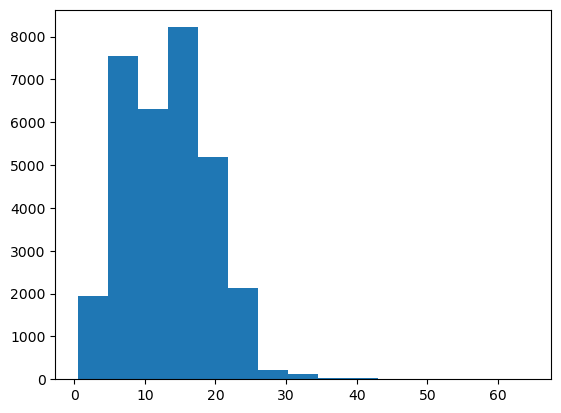

In [37]:
plt.hist(df["Fuel capacity (lts)"], bins=15)
plt.show()

In [38]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df["Fuel capacity (lts)"] = imputer.fit_transform(df[["Fuel capacity (lts)"]])

In [39]:
df = df[(df["Fuel capacity (lts)"] > 4) & (df["Fuel capacity (lts)"] < 30)]

Fuel system column :

In [40]:
list(df["Fuel system"].unique())

[nan,
 'Turbo. KKK Acabion Extended',
 'Carburettor',
 'Injection. EFI',
 'Injection',
 'Carburettor. Bing',
 'Carburettor. Mikuni VM-16',
 'Carburettor. Mikuni VM-16,Jet-100',
 'Carburettor. Mikuni VM-16,Jet-50',
 'Carburettor. Mikuni',
 'Carburettor. Mikuni AM 3',
 'Carburettor. Keihin PTG 22',
 'Carburettor. Mikuni VM16, 2-stroke',
 'Carburettor. Keihin CVK 30',
 'Carburettor. EFI',
 'Carburettor. Keihin CVK30',
 'Injection. EFI port injection',
 'Carburettor. DellÓrto',
 'Carburettor. DellÓrto UB24 BS2',
 'Carburettor. DellÓrto ',
 'Carburettor. DellOrto',
 'Carburettor. Walbro 30 mm',
 'Carburettor. 30 mm',
 'Carburettor. 30mm',
 'Carburettor. Sheng Wey PD5, 26mm',
 'Carburettor. Sheng Wey PB5',
 'Carburettor. Walbro',
 'Carburettor. Walbro - 30mm',
 'Carburettor. Walbro, 30mm',
 'Injection. Delphi fuel injection system 34mm',
 'Injection. Mikuni',
 'Injection. Delphi',
 'Injection. Delphi, 34mm',
 'Injection. Get fuel injection 45mm',
 'Carburettor. Amal',
 'Carburettor. Binks',


In [41]:
def extract_first_word(text):
    if pd.isna(text):
        return 'unknown'

    pattern = r"^([^.]*)" 
    text = str(text)
    match = re.match(pattern, text)
    if match:
        return match.group(1)
    return text.split()[0] if text.split() else 'unknown'

df["Fuel system type"] = df["Fuel system"].apply(extract_first_word)

In [42]:
df["Fuel system type"].unique()

array(['unknown', 'Turbo', 'Carburettor', 'Injection'], dtype=object)

In [43]:
df["Fuel system type"] = df["Fuel system type"].astype("category")

Fuel control column :

In [44]:
df["Fuel control"].unique()

array([nan, 'Overhead Valves (OHV)', 'Overhead Cams (OHC)',
       'Single Overhead Cams (SOHC)',
       'Double Overhead Cams/Twin Cam (DOHC)', 'Port control',
       'Rotary valves', 'Membrane & variable discharge openings',
       'Membrane', 'Desmodromic valve control', 'Sidevalves',
       'Standing valves', 'Pushrods', 'Membrane & power valve',
       'Rotary valves & variable discharge openings'], dtype=object)

In [45]:
# grouping similar fuell control valves together 
valve_mapping = {
    'Overhead Valves (OHV)': 'Overhead Valves',
    'Overhead Cams (OHC)': 'Overhead Cams',
    'Single Overhead Cams (SOHC)': 'Overhead Cams',
    'Double Overhead Cams/Twin Cam (DOHC)': 'Overhead Cams',
    'Port control': 'Port control',
    'Rotary valves': 'Rotary Valves',
    'Membrane & variable discharge openings': 'Membrane Valves',
    'Membrane': 'Membrane Valves',
    'Desmodromic valve control': 'Desmodromic valve',
    'Sidevalves': 'Side Valves',
    'Standing valves': 'Standing valves',
    'Pushrods': 'Overhead Valves',
    'Membrane & power valve': 'Membrane Valves',
    'Rotary valves & variable discharge openings': 'Rotary Valves'
}

df["Fuel control"] = df["Fuel control"].map(valve_mapping)


In [46]:
df["Fuel control"].unique()

array([nan, 'Overhead Valves', 'Overhead Cams', 'Port control',
       'Rotary Valves', 'Membrane Valves', 'Desmodromic valve',
       'Side Valves', 'Standing valves'], dtype=object)

Cooling system column :

In [47]:
df["Cooling system"].unique()

array(['Liquid', nan, 'Air', 'Liquids', 'the air', 'airr', 'air',
       'Oil & air', 'Oil and air'], dtype=object)

In [48]:
df["Cooling system"].isna().sum()

4065

In [49]:
cooling_map = {
    'Liquids' : 'Liquid',
    'the air' : 'Air', 
    'airr' : 'Air',
    'air': 'Air',
    'Oil & air' : 'Oil and air',
    np.nan : 'Unknown'
}

df["Cooling system"] = df["Cooling system"].replace(cooling_map)

In [50]:
df["Cooling system"] = df["Cooling system"].astype("category")

Transmission type column :

In [51]:
df["Transmission type"].unique()

array(['Chain', nan, 'Belt', 'Shaft drive'], dtype=object)

In [52]:
df["Transmission type"].isna().sum()

5300

In [53]:
df["Transmission type"] = df["Transmission type"].replace(np.nan, 'unknown')

In [54]:
df["Transmission type"] = df["Transmission type"].astype("category")

Dry weight (kg) column:

In [55]:
df["Dry weight (kg)"].describe()

count    21237.000000
mean       166.735659
std         77.796639
min         18.000000
25%        108.900000
50%        150.000000
75%        202.000000
max       1000.000000
Name: Dry weight (kg), dtype: float64

In [56]:
valid_mean = df[(df["Dry weight (kg)"] > 90) & (df["Dry weight (kg)"] < 400)]["Dry weight (kg)"].mean()

df["Dry weight (kg)"] = df["Dry weight (kg)"].apply(lambda x: valid_mean if x <= 90 or x >= 400 else x)

Wheelbase (mm) column :

In [60]:
df["Wheelbase (mm)"].describe()

count    24269.000000
mean      1438.742316
std        119.606827
min       1201.000000
25%       1355.000000
50%       1438.742316
75%       1498.000000
max       1798.000000
Name: Wheelbase (mm), dtype: float64

In [59]:
valid_mean = df[(df["Wheelbase (mm)"] > 1200) & (df["Wheelbase (mm)"] < 1800)]["Wheelbase (mm)"].mean()

df["Wheelbase (mm)"] = df["Wheelbase (mm)"].apply(lambda x: valid_mean if x <= 1200 or x >= 1800 else x)

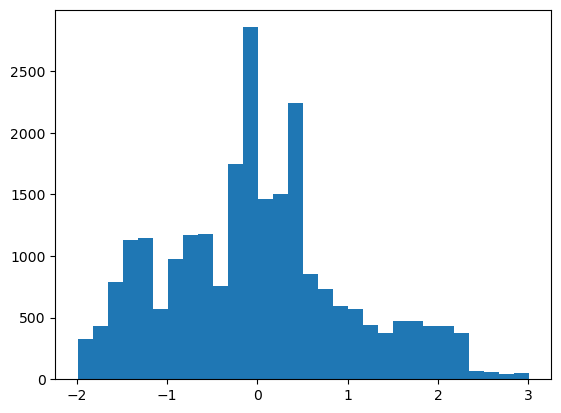

In [65]:
plt.hist(df["Wheelbase (mm)"], bins=30)
plt.show()

In [63]:
scaler = StandardScaler()
df["Wheelbase (mm)"] = scaler.fit_transform(df[["Wheelbase (mm)"]])

Seat height (mm) column :

In [66]:
df["Seat height (mm)"].describe()

count    22952.000000
mean       794.588794
std        103.346542
min         39.000000
25%        750.000000
50%        795.000000
75%        833.000000
max       7501.000000
Name: Seat height (mm), dtype: float64

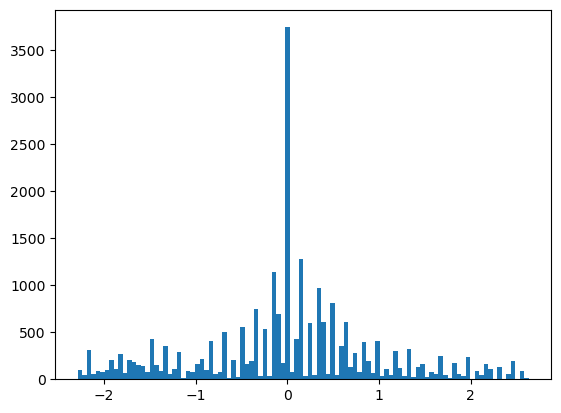

In [9]:
plt.hist(df["Seat height (mm)"], bins=100)
plt.show()

In [5]:
valid_mean = df[(df["Seat height (mm)"] > 650) & (df["Seat height (mm)"] < 950)]["Seat height (mm)"].mean()

df["Seat height (mm)"] = df["Seat height (mm)"].apply(lambda x: valid_mean if x <=650 or x >= 950 else x)

In [6]:
df["Seat height (mm)"].describe()

count    24225.000000
mean       790.079304
std         60.334055
min        652.000000
25%        760.000000
50%        790.079304
75%        820.000000
max        949.000000
Name: Seat height (mm), dtype: float64

In [8]:
scaler = StandardScaler()
df["Seat height (mm)"] = scaler.fit_transform(df[["Seat height (mm)"]])